In [86]:
import anndata as ad
adata = ad.read_h5ad('pbmc_patients.h5ad')
adata_ctrl = adata[adata.obs['condition'] == 'ctrl'].copy()
adata_ctrl.obs_names_make_unique()
adata_ctrl.var_names_make_unique()
adata_ctrl.obs['sample_id'] = ('si_' + adata_ctrl.obs['sample_id'].astype(str)).astype('category')
adata_ctrl.obs['sample_id']

barcode
AAACATACATTTCC-1      si_1016
AAACATACCAGAAA-1      si_1256
AAACATACCATGCA-1      si_1488
AAACATACCTCGCT-1      si_1256
AAACATACCTGGTA-1      si_1039
                       ...   
TTCTGATGTCTCGC-1-1    si_1016
TTGGAGTGCTCGAA-1-1    si_1244
TTTAGCTGCGAACT-1-1    si_1488
TTTATCCTGCGAGA-1-1    si_1015
TTTATCCTGGAAAT-1-1    si_1015
Name: sample_id, Length: 12494, dtype: category
Categories (8, object): ['si_101', 'si_1015', 'si_1016', 'si_1039', 'si_107', 'si_1244', 'si_1256', 'si_1488']

In [87]:
import numpy as np
normalized_mtx = np.exp(adata_ctrl.X).T
normalized_mtx.shape

(1000, 12494)

In [88]:
import pandas as pd
cell_expression = pd.DataFrame(normalized_mtx, index = adata_ctrl.var_names, columns = adata_ctrl.obs_names)
cell_expression

barcode,AAACATACATTTCC-1,AAACATACCAGAAA-1,AAACATACCATGCA-1,AAACATACCTCGCT-1,AAACATACCTGGTA-1,AAACATACGATGAA-1,AAACATACGCCAAT-1,AAACATACGCTTCC-1,AAACATACGGCATT-1,AAACATACGTGTAC-1,...,TGGATTCTGAGGAC-1-1,TGGCAATGAGAAGT-1-1,TGGCAATGTGCCTC-1-1,TGTCAGGACGAATC-1-1,TTCCATGATCATTC-1-1,TTCTGATGTCTCGC-1-1,TTGGAGTGCTCGAA-1-1,TTTAGCTGCGAACT-1-1,TTTATCCTGCGAGA-1-1,TTTATCCTGGAAAT-1-1
symbol,,,,,,,,,,,,,,,,,,,,,
HES4,0.731094,0.731094,0.731094,0.731094,0.731094,0.731094,0.731094,0.731094,0.731094,0.731094,...,0.731094,0.731094,0.731094,0.731094,0.731094,0.731094,0.731094,16.512205,0.731094,0.731094
ISG15,0.332175,0.332175,0.332175,0.601932,0.617839,0.332175,0.332175,0.332175,1.221153,0.332175,...,1.279654,2.736710,2.107871,1.075847,1.724333,1.557984,5.023214,4.501305,1.874625,5.272378
RP11-54O7.18,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,...,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438,0.990438
TNFRSF18,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,...,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139,0.796139
TNFRSF4,0.804743,0.804743,0.804743,0.804743,1256.967041,32.892929,0.804743,0.804743,0.804743,0.804743,...,0.804743,0.804743,0.804743,0.804743,0.804743,0.804743,0.804743,0.804743,0.804743,0.804743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWP2,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,...,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866,0.905866
AL773604.8,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,...,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233,0.986233
ADARB1,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,...,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406,0.932406


In [89]:
cell_expression.to_csv('./cell_expression.txt', sep='\t')

In [90]:
cell_annotations = pd.DataFrame(adata_ctrl.obs['sample_id'], columns = ['sample_id'])
cell_annotations

,sample_id
barcode,
AAACATACATTTCC-1,si_1016
AAACATACCAGAAA-1,si_1256
AAACATACCATGCA-1,si_1488
AAACATACCTCGCT-1,si_1256
AAACATACCTGGTA-1,si_1039
...,...
TTCTGATGTCTCGC-1-1,si_1016
TTGGAGTGCTCGAA-1-1,si_1244
TTTAGCTGCGAACT-1-1,si_1488


In [91]:
cell_annotations.to_csv('./cell_annotations.txt', sep = '\t')

cytotrace2: Input parameters
    Input file: ./cell_expression.txt
    Species: human
    Parallelization enabled: True
    Batch size: 20000
    Smoothing batch size: 1000
    Seed: 14
    Output directory: cytotrace2_results
    Plotting enabled: True
    Verbose mode enabled: True
    User-provided limit for number of cores to use: None
       ...96 cores detected. CytoTRACE 2 will run using up to 48/96 cores.
cytotrace2: Loading dataset
cytotrace2: Dataset characteristics
    Number of input genes:  1000
    Number of input cells:  12494
cytotrace2: Computing UMAP embeddings from full expression


/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cytotrace2: The passed batch_size is greater than the number of cells in the subsample. 
    Now setting batch_size to 12494.
cytotrace2: Preprocessing
cytotrace2: Running 1 prediction batch(es) sequentially using 20 cores per batch.
cytotrace2: Initiated processing batch 1/1 with 12494 cells
    Mapped 697 input gene names to mouse orthologs
    697 input genes are present in the model features.


/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:205: UserWarning:     Please verify the input species is correct.
    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.
  warnings.warn("    Please verify the input species is correct.\n    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.")


cytotrace2: Performing initial model prediction
cytotrace2: Performing smoothing by diffusion
cytotrace2: Performing smoothing by adaptive KNN
cytotrace2: Plotting outputs


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

cytotrace2: Finished.


,CytoTRACE2_Score,CytoTRACE2_Potency,CytoTRACE2_Relative,preKNN_CytoTRACE2_Score,preKNN_CytoTRACE2_Potency
AAACATACATTTCC-1,0.200032,Unipotent,0.627787,0.150124,Differentiated
AAACATACCAGAAA-1,0.146951,Differentiated,0.460702,0.162848,Differentiated
AAACATACCATGCA-1,0.135666,Differentiated,0.425180,0.141449,Differentiated
AAACATACCTCGCT-1,0.255296,Unipotent,0.801744,0.241721,Unipotent
AAACATACCTGGTA-1,0.078908,Differentiated,0.246520,0.071719,Differentiated
...,...,...,...,...,...
TTCTGATGTCTCGC-1-1,0.203504,Unipotent,0.638716,0.140484,Differentiated
TTGGAGTGCTCGAA-1-1,0.215445,Unipotent,0.676304,0.248380,Unipotent
TTTAGCTGCGAACT-1-1,0.174189,Unipotent,0.546439,0.163194,Differentiated
TTTATCCTGCGAGA-1-1,0.027995,Differentiated,0.086259,0.024050,Differentiated


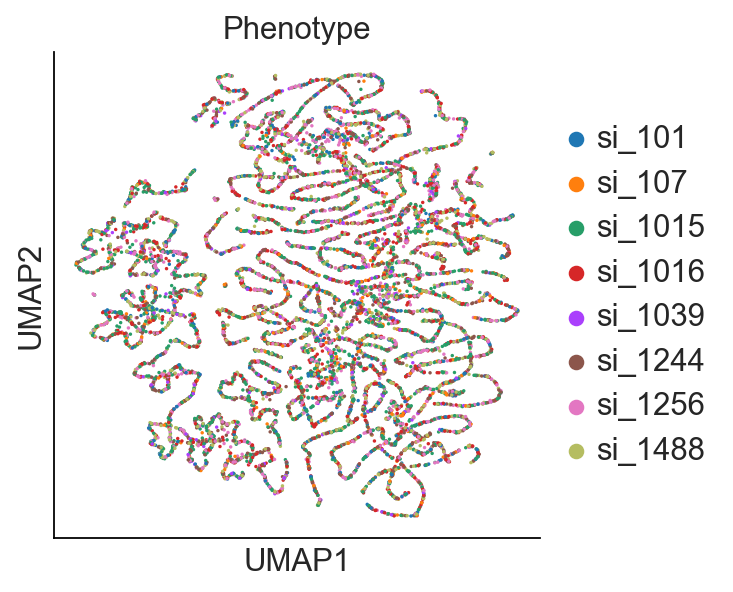

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

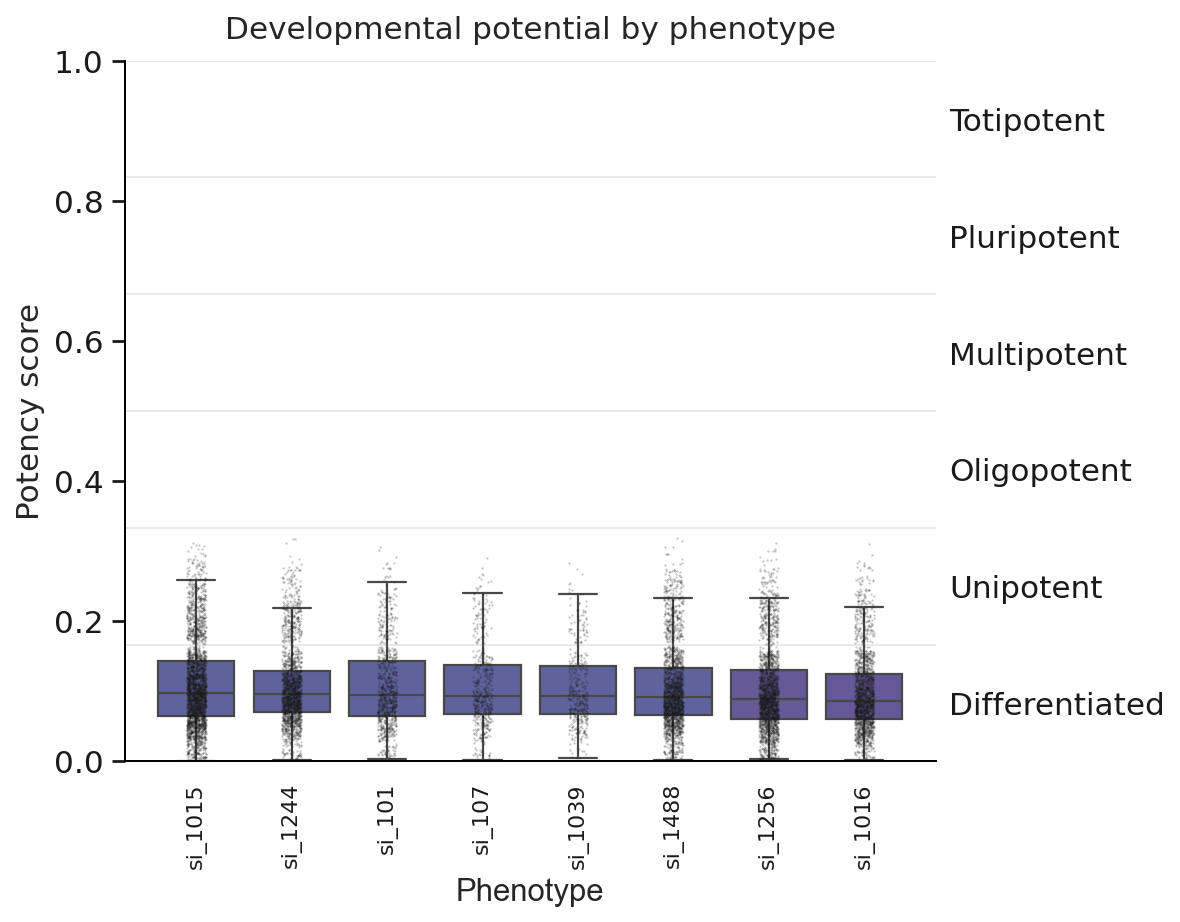

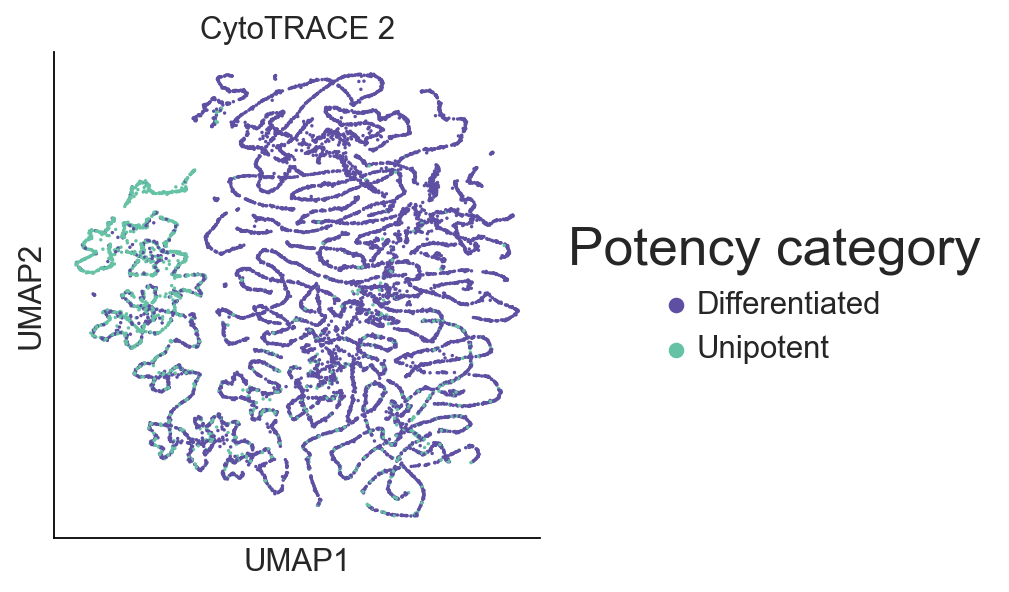

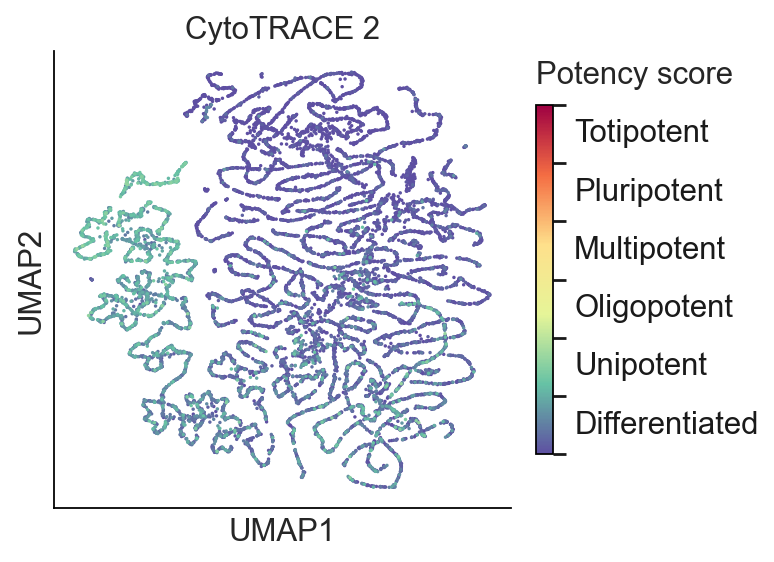

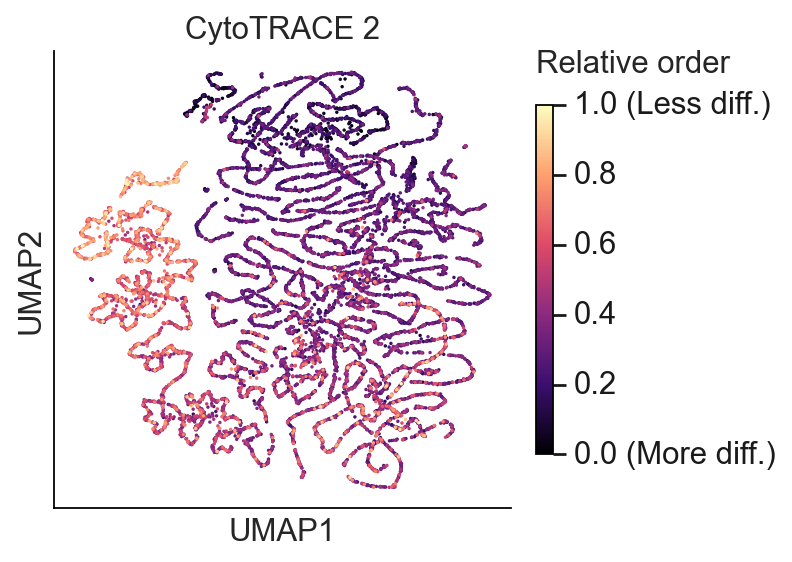

In [92]:
import seaborn as sns
sns.set_theme(style = 'white', font = 'Arial', font_scale = 2)
import cytotrace2_py as ct
input_path = './cell_expression.txt'
annotation_path = './cell_annotations.txt'
species = 'human'
res = ct.cytotrace2(input_path = input_path, annotation_path = annotation_path, species = species)
res